# CAMBAM Workshop: Exploring Single Neuron Excitability with Mathematical and Computational Models

 ## Numerical Simulations of Neuron Models
##### Nils Koch and Niklas Brake


In [2]:
import numpy as np
from matplotlib import pyplot as plt

# 1. Simulating the integrate-and-fire model with Euler's method

The integrate and fire model is a 1-dimensional system of ordinary differential equations with a resetting criterion. The differential equation is
$$\frac{dV}{dt} = g_L(V_r-V) + I$$
and the resetting criterion: if V>-30, then
$$ V \leftarrow V_r$$

Below is example code for simulating this model using Euler's method. The code simulates the model for 2000 ms with a timestep of 1 ms, with an initial value for $V(0)=-60$, and uses the parameters $g_L=0.001$, $V_r=-60$, and $I=0.5$.

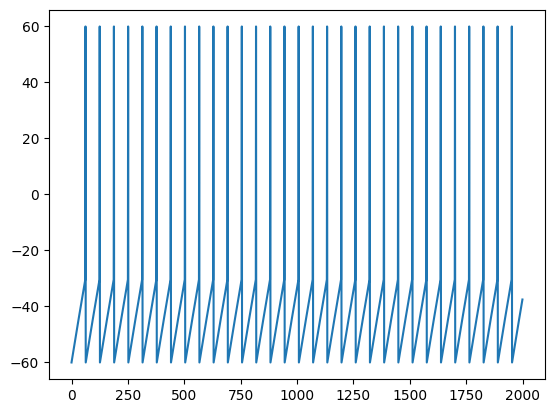

In [3]:
# integrate-and-fire model
dt = 1 # Specify step size (1 ms)
tmax = 2000 # Specify maximal length of simulation (2000 ms)
T = np.arange(0,tmax,dt) # Define time-vector, which will range from 0 to tmax in steps of dt
V = np.zeros([len(T),1]) # Preallocate a vector for storing the simulation results

# Specify differential equation and initial conditions
dVdt = lambda V: 0.001*(-60-V) + 0.5
V[0] = -60

# Forward Euler algorithm
for i in range(0,len(T)-1):
    if(V[i]>-30):
        V[i] = 60 # Make the spike go up to 60 mV when threshold is crossed (optional)
        V[i+1] = -60
    else:
        V[i+1] = V[i] + dt*dVdt(V[i])

# Plot simulation results
plt.plot(T,V)
plt.show()

#### Simulating a model with variable conditions
The code below repeats the above exercise, but now includes a variable current injection that simulates a current step protocol. This is done by adding I as an input of the function "dVdt". One could also make the parameters $g_L$ and $V_m$ to be inputs into the function, which can faciliate parameter changes.

Can you modify the code to inject random current instead of a step current? *Hint*: use np.random.randn() to generate Gaussian white noise.

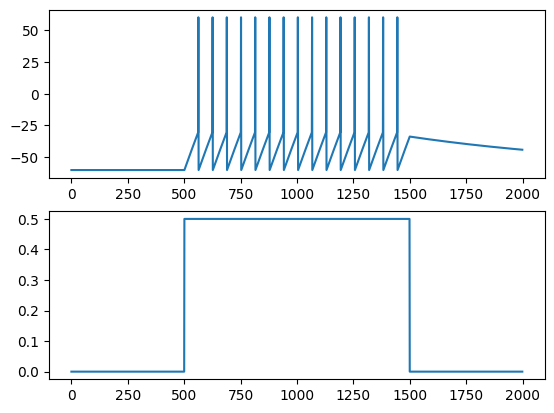

In [4]:
# integrate-and-fire model
dt = 1
tmax = 2000
T = np.arange(0,tmax,dt)
x = np.zeros([len(T),1])

# Add I as a function input
dVdt = lambda V,I: 0.001*(-60-V) + I
V[0] = -60

# Define the injected current to be 0.5 when T>500 and T<1500
I = 0.5*(T>500)*(T<1500)

# Forward Euler algorithm
for i in range(0,len(T)-1):
    if(V[i]>-30):
        V[i] = 60
        V[i+1] = -60
    else:
        V[i+1] = V[i] + dt*dVdt(V[i],I[i])

# Plot simulation results
plt.subplot(2,1,1)
plt.plot(T,V)
plt.subplot(2,1,2)
plt.plot(T,I)
plt.show()

# 2. Simulating the Fitzhugh-Nagumo model
The above model is a 1D system. However, the Euler method generalizes easily to higher dimensions. Here, we simulate the Fitzhugh-Nagumo model, which is a 2D system of ODEs
\begin{align}
\frac{dv}{dt} &= v - \frac{v^3}{3} -w +I \\
\frac{dw}{dt} &= \frac{1}{\tau}(v + a - bw)
\end{align}

For this example, we use the parameters $a=0.7$, $b=0.8$, $\tau=12.5$ and $I=0.5$. However, the plotted results tell us that something is **wrong** with this simulation. What is it and how do you fix it?

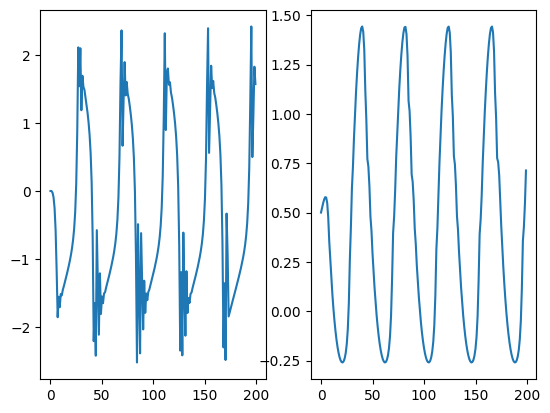

In [5]:
# Fitzhugh-Nagumo
dt = 1
tmax = 200
T = np.arange(0,tmax,dt)
v = np.zeros([len(T),1])
w = np.zeros([len(T),1])

# Define FN parameters
tau = 12.5
a = 0.7
b = 0.8
I = 0.5

# Define differential equations for both v and w
dvdt = lambda v,w: v-v**3/3-w+I
dwdt = lambda v,w: (v+a-b*w)/tau

v[0] = 0 # Initial value for v
w[0] = 0.5 # Initial value for w

for i in range(0,len(T)-1):
    # Notice there is no resetting condition
    w[i+1] = w[i] + dt*dwdt(v[i],w[i])
    v[i+1] = v[i] + dt*dvdt(v[i],w[i])

# Plot simulation results
plt.subplot(1,2,1)
plt.plot(T,v)
plt.subplot(1,2,2)
plt.plot(T,w)
plt.show()

# 3. Simulating the Izhikevich model
The Izhikevich model is a combination of the above integrate-and-fire model and Fitzhugh-Nagumo model: it is a 2D system with a resetting criterion. The simplified nondimensional system of equations is
\begin{align}
\frac{dV}{dt} &= 0.04 V^2 + 5 V + 140 - u + I \\
\frac{du}{dt} &= a (b V - u)
\end{align}
and the restting criterion is
\begin{equation}
\text{if } V\ge V_{th} \text{: then } V\leftarrow c, u \leftarrow u+d
\end{equation}

Write code to simulate the Izhikevich model with parameters $a=0.02$, $b=0.2$, $c=-65$, and $d=8$ and a step current from $I=0$ to $I=5$.

In [ ]:
# Write code to simulate the Izhikevich model

#### Hand tuning Izhikevich parameters
The above code should generate spikes in the parameter V. By changing parameters $c$ and $d$ you should be able to turn the model into a bursting neuron like below. Try playing with parameters $c$ and $d$ to reproudce this behaviour. *Hint*: try writing a python function that takes as input the parameters $c$ and $d$ and outputs the results of the simulation.

![alt text](bursting.png "Izhikevich neuron - bursting")



In [ ]:
# Write a function that takes parameters c and d as arguments and returns simulation output

In [52]:
# Play around with parameters c and d by hand to see if you can reproduce the bursting activity